In [3]:
import numpy as np
import pandas as pd
import cv2
from sklearn.datasets import fetch_openml # veri kümesi için kullanılır
from skimage.filters import threshold_otsu #eşik değeri belirtir pikseller için
#görüntü üzerindeki piksel değerlerini 2 sınıfa böler,eşik değerinin üstü bir sınıfa atanır
#eşik değerinin altı bir sınıfa atanır
from sklearn.model_selection import train_test_split #veri kümemizi eğitim ve test olarak böler
 #karar ağacı sınıflandırma modeli
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #rastgele orman sınıflandırma modeli
from sklearn.metrics import accuracy_score #basarım ölcütü
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #confusion matrix hesaplama ve gösterim
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#MNIST veri kümesi yükleme

mnist= fetch_openml('mnist_784',version=1)

C:\Users\90543\miniconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
X=mnist["data"]
Y=mnist["target"]

In [6]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
28*28

784

In [8]:
len(X) # verimiz adedi

70000

In [9]:
Y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [10]:
Y.unique().tolist()

['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']

In [11]:
pd.DataFrame(Y).groupby("class").size()

class
0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
dtype: int64

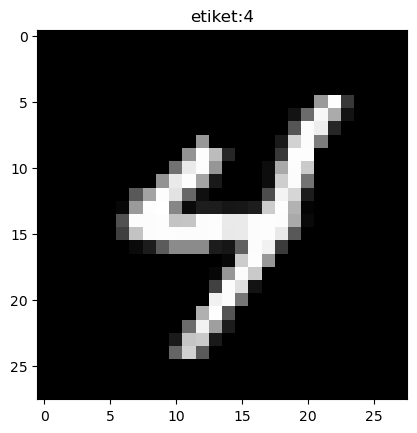

In [12]:
X=mnist["data"].to_numpy()
Y=mnist["target"]
# örnek bir görüntü seçme
image_index=115
image=X[image_index].reshape(28,28)
#görüntüyü gösterme
plt.imshow(image,cmap="gray")
plt.title("etiket:"+str(Y[image_index]))
plt.show()

In [13]:
X_clean=[]
for image in X:
    threshold_value=threshold_otsu(image)
    binary_image=image>threshold_value
    X_clean.append(binary_image.flatten())
    

In [14]:
X_clean[5]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X_clean,Y,test_size=0.2,random_state=42)


In [16]:
len(X_train)

56000

In [17]:
len(Y_train)

56000

In [18]:
len(X_test)

14000

In [19]:
len(Y_test)

14000

In [20]:
#makine öğrenmesi
model= DecisionTreeClassifier()
#model eğitimi
model.fit(X_train,Y_train)
#test veri kümesi üzerinden tahmin yapılması
Y_pred=model.predict(X_test)

In [21]:
Y_pred

array(['8', '4', '6', ..., '2', '7', '1'], dtype=object)

In [22]:
Y_test

46730    8
48393    4
41416    8
34506    7
43725    7
        ..
21525    3
16276    5
24390    2
28061    7
63452    1
Name: class, Length: 14000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [23]:
accuracy=accuracy_score(Y_test,Y_pred)
print("accuracy:",accuracy)

accuracy: 0.8669285714285714


In [24]:
f1_score=f1_score(Y_test,Y_pred,average="weighted")
print("f1_score:",f1_score)

f1_score: 0.8667132213680423


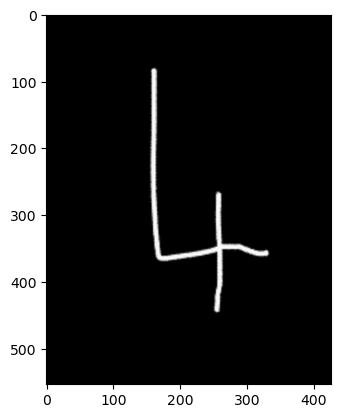

In [25]:
#Dışarıdan örnek veri ile test edilme

image=cv2.imread('data/dort.png')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)

In [26]:
image.shape

(554, 426, 3)

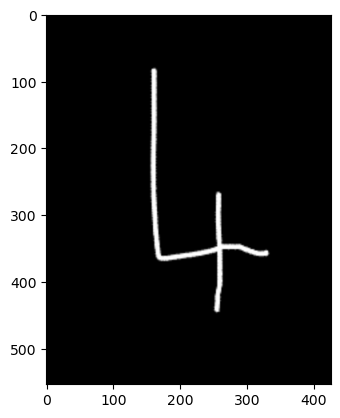

In [27]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(image,cmap='gray')

In [28]:
image.shape

(554, 426)

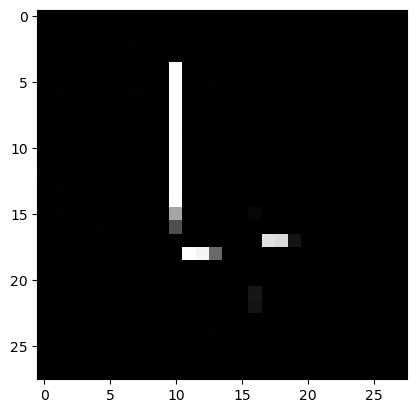

In [29]:
image=cv2.resize(image,(28,28))
plt.imshow(image,cmap='gray')

In [30]:
image_array=np.array(image)

threshold_value=threshold_otsu(image_array)
binary_image= image>threshold_value
image_array= binary_image.flatten()

image_array=image_array.reshape(1,-1) #1 boyutlu vektöre çevirme

In [31]:
image_array

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
      

In [32]:
prediction=model.predict(image_array)
print("tahmin: ",prediction )

tahmin:  ['4']


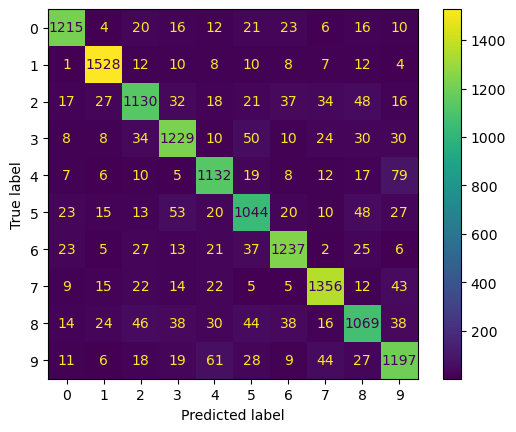

In [36]:
cm=confusion_matrix(Y_test,Y_pred,labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [37]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
from sklearn import metrics

In [46]:
#Veriyi train ve test olarak bölme
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#Makine öğrenmesi
model= DecisionTreeClassifier()

#model eğitimi
model.fit(X_train,Y_train)

#test veri kümesi üzerinden tahmin yapılması
y_pred=model.predict(X_test)

accuracy= accuracy_score(Y_test,Y_pred)
print("accuracy: ",accuracy)

f1_score= metrics.f1_score(Y_test,Y_pred, average="weighted")
print("f1_score: ",f1_score)

accuracy:  0.9662857142857143
f1_score:  0.9662674047773645


In [47]:
#random forest model

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#Makine öğrenmesi
model= RandomForestClassifier()

#model eğitimi
model.fit(X_train,Y_train)

#test veri kümesi üzerinden tahmin yapılması
Y_pred=model.predict(X_test)

accuracy= accuracy_score(Y_test,Y_pred)
print("accuracy: ",accuracy)

f1_score= metrics.f1_score(Y_test,Y_pred, average="weighted")
print("f1_score: ",f1_score)

accuracy:  0.9668571428571429
f1_score:  0.9668296943086586
